<a href="https://colab.research.google.com/github/TerriDonut/Yandex-educational-projects/blob/main/go_fast_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Введение:</b>
    
Предстоит проанализировать данные популярного сервиса аренды самокатов GoFast, проверив некоторые гипотезы, которые могут помочь бизнесу вырасти. В распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки или с подпиской Ultra


<b>План исследования:</b>

- Описать и визуализировать общую информацию о пользователях и поездках:
-- частота встречаемости городов;
-- соотношение пользователей с подпиской и без подписки;
-- возраст пользователей;
-- расстояние, которое пользователь преодолел за одну поездку;
-- продолжительность поездок.

- Подсчитать выручку от пользователей с подпиской и без

- Проверить гипотезы:
-- "Выгодность" пользователей с подпиской
-- Соответствие среднего растояние поездки с оптимальным
-- Разница в ежемесячной выручке от двух категорий пользователей


##Шаг 1. Открытие файлов с данными и изучение общей информации
---



In [ ]:
#Импорт необходимых бибилиотек
from scipy import stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [ ]:
#Вызов общей информации по данным
try:
    df_riders = pd.read_csv('/content/rides_go.csv')
    df_sub = pd.read_csv('/content/subscriptions_go.csv')
    df_users = pd.read_csv('/content/users_go.csv')
except:
    df_riders = pd.read_csv('/datasets/rides_go.csv')
    df_sub = pd.read_csv('/datasets/subscriptions_go.csv')
    df_users = pd.read_csv('/datasets/users_go.csv')

display(df_riders.info())
display(df_sub.info())
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
display(df_riders.head())
display(df_sub.head())
df_users.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


## Шаг 2. Предобработка даных

In [ ]:
#Перевожу столбец в формат дыты\времени
df_riders['date'] = pd.to_datetime(df_riders['date'])
df_riders['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

In [ ]:
#Создаю новый столбец номером месяца
df_riders['month_drive'] = df_riders['date'].dt.month

In [ ]:
#Подсчёт количества пропусков в столбцах
display(df_riders.isna().mean()*100)
display(df_sub.isna().mean()*100)
(df_users.isna().mean()*100)

user_id        0.0
distance       0.0
duration       0.0
date           0.0
month_drive    0.0
dtype: float64

subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64

In [ ]:
#Вывод количества дубликатов
display(df_riders.apply(lambda col: col.duplicated().sum()))
display(df_riders.duplicated().sum())

display(df_sub.apply(lambda col: col.duplicated().sum()))
display(df_sub.duplicated().sum())

display(df_users.apply(lambda col: col.duplicated().sum()))
display(df_users.duplicated().sum())

user_id        16534
distance           0
duration          94
date           17704
month_drive    18056
dtype: int64

0

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

0

user_id                31
name                 1371
age                  1536
city                 1557
subscription_type    1563
dtype: int64

31

<b> Вывод: </b>

- Дубликаты id в столбцах датафрейма поездок можно объяснить повторением поездок, которые совершал пользователь
-- Время и дата тоже вполне могут дублироваться

- Дубли id для датафрейма пользователей недопустимы, значение должно быть уникальным, плюс количество повторений id совпадает с дублями строк, удалю их
-- Остальные дубли вполне уместны

In [ ]:
#Контроль размера датасета
temp = df_users.copy()
len(temp)

1565

In [ ]:
#Удалю дубликаты
df_users = df_users.drop_duplicates(subset='user_id')

In [ ]:
#Проверка
display(len(df_users))
df_users.duplicated(subset='user_id').value_counts()

1534

False    1534
dtype: int64

## Шаг3. Исследовательский анализ данных

In [ ]:
#Соотношение городов
df_users['city'].value_counts(normalize=True).round(3)

Пятигорск         0.143
Екатеринбург      0.133
Ростов-на-Дону    0.129
Краснодар         0.126
Сочи              0.123
Омск              0.119
Тюмень            0.117
Москва            0.110
Name: city, dtype: float64

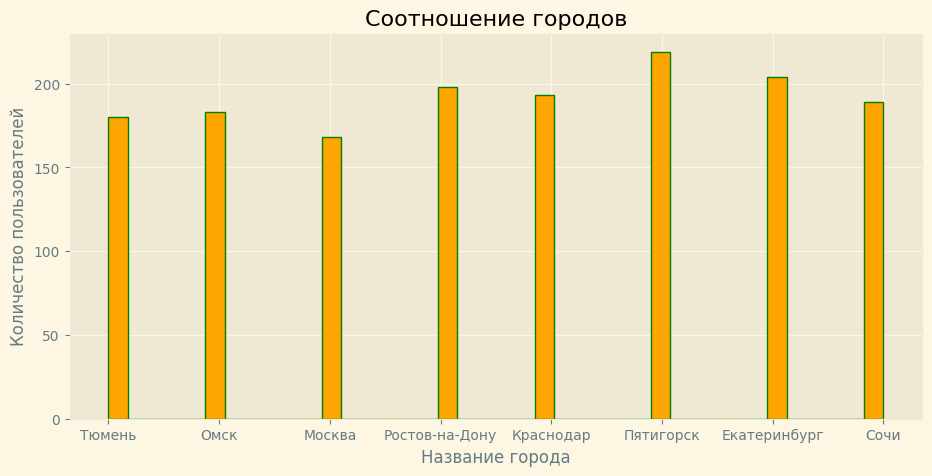

In [ ]:
plt.style.use('Solarize_Light2')

#Визуализация
plt.figure(figsize=(11, 5))
plt.hist(df_users['city'], color='orange', edgecolor='green', bins=40);
plt.title('Соотношение городов');
plt.xlabel('Название города');
plt.ylabel('Количество пользователей');

free     0.54
ultra    0.46
Name: subscription_type, dtype: float64

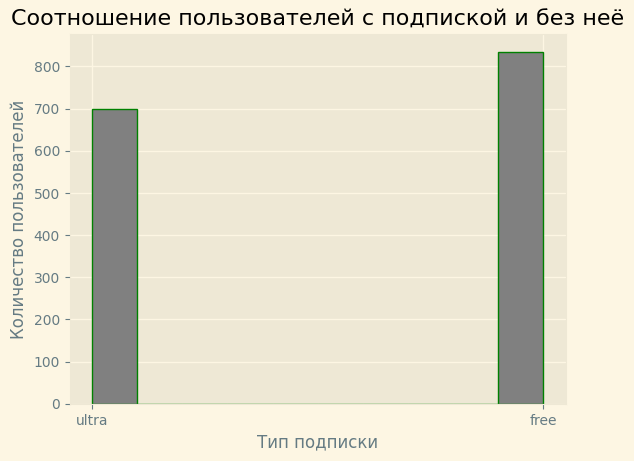

In [ ]:
#Визуализация
plt.hist(df_users['subscription_type'], color='grey', edgecolor='green');
plt.title('Соотношение пользователей с подпиской и без неё');
plt.xlabel('Тип подписки');
plt.ylabel('Количество пользователей');

#Соотношение пользоватей с подпиской и без
df_users['subscription_type'].value_counts(normalize=True).round(2)

25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

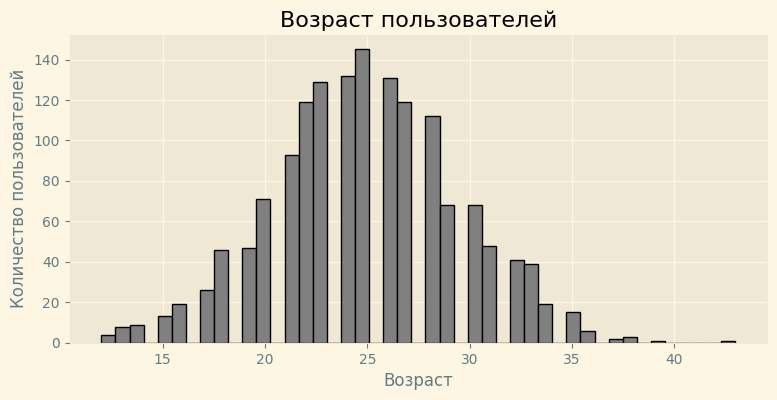

In [ ]:
#Визуализация
plt.figure(figsize=(9, 4))
plt.hist(df_users['age'], color='grey', edgecolor='black', bins=45);
plt.title('Возраст пользователей');
plt.xlabel('Возраст');
plt.ylabel('Количество пользователей');

#Возраст пользователей
df_users['age'].value_counts()

Среднее расстояние поездки: 3070.66


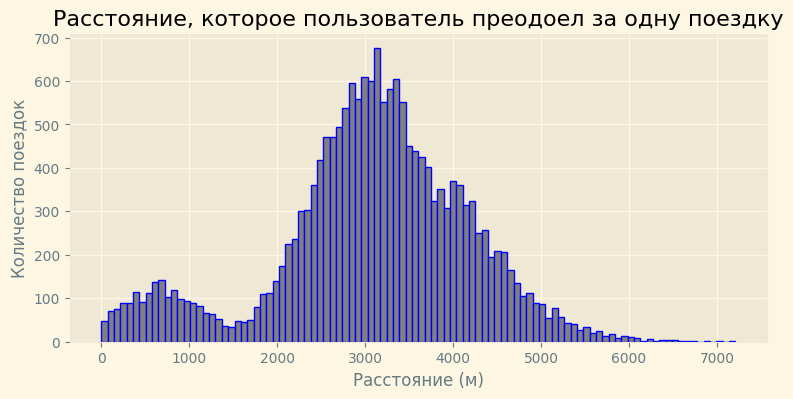

In [ ]:
print('Среднее расстояние поездки:', df_riders['distance'].mean().round(2))
#Визуализация расстояния, которое пользователь преодолел
plt.figure(figsize=(9, 4))
plt.hist(df_riders['distance'], color='grey', edgecolor='blue', bins=100);
plt.title('Расстояние, которое пользователь преодоел за одну поездку');
plt.xlabel('Расстояние (м)');
plt.ylabel('Количество поездок');

Среднее время поездки: 17.81


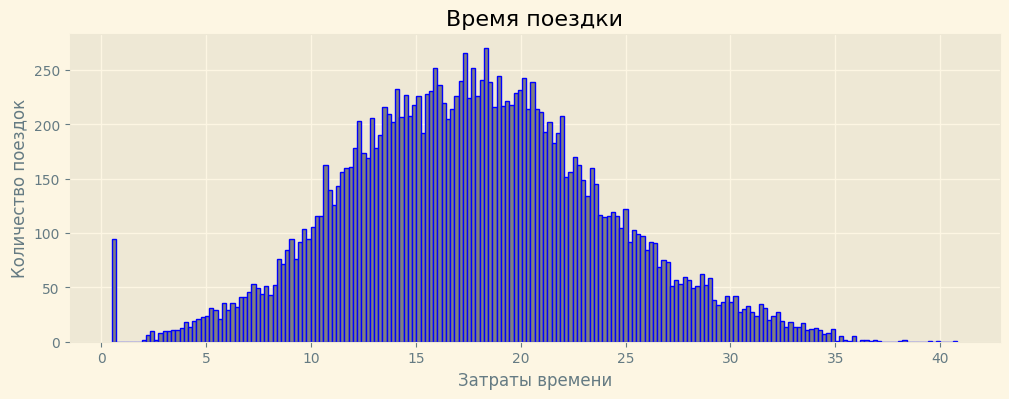

In [ ]:
print('Среднее время поездки:', df_riders['duration'].mean().round(2))
#Визуализация времени поездки
plt.figure(figsize=(12, 4))
plt.hist(df_riders['duration'], color='grey', edgecolor='blue', bins=200);
plt.title('Время поездки');
plt.xlabel('Затраты времени');
plt.ylabel('Количество поездок');

<b> Вывод: </b>

- Среди городов осутствует явный кандидат с большим отрывом, в топ-3 вошли:
-- Пятигорск
-- Екатеринбург
-- Ростов-на-Дону

- Количество пользователей с подпиской практически соразмерны с пользователями без нее
- В возрасте пользователей наблюдается нормальное распределение с пиком в районе 25, в итоге большинство входит в диапазон 20 - 30 лет
- Расстояние в среднем равно 3км, с небольшим скачком в районе от 0 до 1км, что может быть связанно с ситуациями нехватки времени, и близости местоположения, пешком долго, на общественном транспорте или такси непрактично
- Среднее время поездки укладывается в диапазон около 17 минут, присутствует аномальный скачок в районе 1мин на поездку, адекватного объяснения нет, скорее всего ошибка в данных, да и пользователи тратящие 1 минуту на поездку, при системе поминтуной оплаты не предсталвяют интереса для исследования

## Шаг 4. Объединение данных

In [ ]:
#Объединение столбцов
df1 = df_riders.merge(df_users, on='user_id', how='left')
data = df1.merge(df_sub, on='subscription_type', how='left')

#Проверка
data.head()

,user_id,distance,duration,date,month_drive,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [ ]:
#Создание срезов пользователей с подпиской и без
sub_us = data.query('subscription_type == "ultra"')
no_sub_us = data.query('subscription_type == "free"')

Среднее расстояние поездки с подпиской: 3115.45
Среднее расстояние поездки без подписки: 3045.5


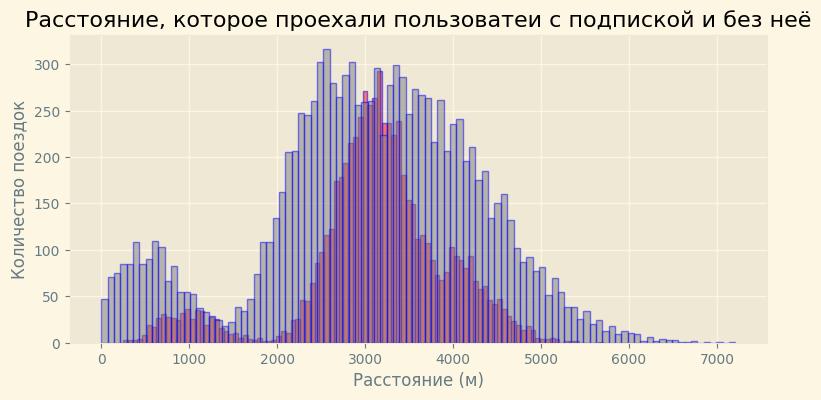

In [ ]:
#Визуализация
plt.figure(figsize=(9, 4))
plt.hist(sub_us['distance'], alpha=0.5, color='red', edgecolor='blue', bins=100);
plt.hist(no_sub_us['distance'], alpha=0.5, color='grey', edgecolor='blue', bins=100);
plt.title('Расстояние, которое проехали пользоватеи с подпиской и без неё');
plt.xlabel('Расстояние (м)');
plt.ylabel('Количество поездок');

#Вывод средних
print('Среднее расстояние поездки с подпиской:', sub_us['distance'].mean().round(2))
print('Среднее расстояние поездки без подписки:', no_sub_us['distance'].mean().round(2))

Среднее время поездки с подпиской: 18.54
Среднее время поездки без подписки: 17.39


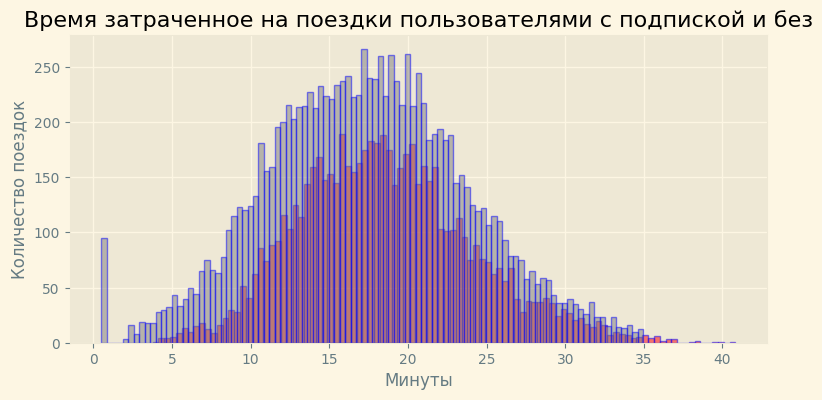

In [ ]:
#Визуализация
plt.figure(figsize=(9, 4))
plt.hist(sub_us['duration'], alpha=0.5, color='red', edgecolor='blue', bins=100);
plt.hist(no_sub_us['duration'], alpha=0.5, color='grey', edgecolor='blue', bins=100);
plt.title('Время затраченное на поездки пользователями с подпиской и без');
plt.xlabel('Минуты');
plt.ylabel('Количество поездок');

#Вывод средних
print('Среднее время поездки с подпиской:', sub_us['duration'].mean().round(2))
print('Среднее время поездки без подписки:', no_sub_us['duration'].mean().round(2))

<b> Вывод: </b>

- Пользователи с подпиской в среднем ездят дальше и дольше, но уступают в количестве
- За аномалию связанную с минутными поездками ответственны пользователи без подписки, теперь можно предположить что пользователи без подписки впервые столкнувшись со взаимодействием с самокатом/приложением не всегда могут справиться, что и приводит к аномалии в длительности

## Шаг 5. Подсчёт выручки

In [ ]:
#Округляю значения времени
data['duration'] = np.ceil(data['duration'])

#Создам столбец для дальнейших подсчётов количества поездок
data['trips_count'] = 1

#Подсчитаю количество поездок/времени/расстояния на каждого пользователя
revenue_df = data.groupby(['user_id', 'month_drive']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'trips_count': 'sum'}).reset_index()
revenue_df.head(10)

,user_id,month_drive,distance,duration,trips_count
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3
5,1,12,6751.629942,28.0,2
6,2,3,10187.723006,63.0,3
7,2,4,6164.381824,40.0,2
8,2,6,3255.338202,14.0,1
9,2,7,6780.722964,48.0,2


In [ ]:
#Объединяю датафреймы
revenue_df = revenue_df.join(data, on='user_id', rsuffix=('_y'))
#Удалю дубли столбцов
revenue_df.drop(columns=revenue_df.filter(regex='_y$').columns, inplace=True)

#Считаю ежемесячную выручку
revenue_df['monthly_revenue'] = revenue_df['start_ride_price'] * revenue_df['trips_count'] + revenue_df['minute_price'] * revenue_df['duration'] + revenue_df['subscription_fee']
#Проверка
revenue_df.head(8)

,user_id,month_drive,distance,duration,trips_count,date,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0.0,1,1.0,7027.511294,42.0,2.0,2021-01-18,Кира,22,Тюмень,ultra,6,0,199,451.0
1.0,1,4.0,754.159807,7.0,1.0,2021-01-18,Кира,22,Тюмень,ultra,6,0,199,241.0
2.0,1,8.0,6723.470560,46.0,2.0,2021-01-18,Кира,22,Тюмень,ultra,6,0,199,475.0
3.0,1,10.0,5809.911100,32.0,2.0,2021-01-18,Кира,22,Тюмень,ultra,6,0,199,391.0
4.0,1,11.0,7003.499363,56.0,3.0,2021-01-18,Кира,22,Тюмень,ultra,6,0,199,535.0
5.0,1,12.0,6751.629942,28.0,2.0,2021-01-18,Кира,22,Тюмень,ultra,6,0,199,367.0
6.0,2,3.0,10187.723006,63.0,3.0,2021-04-20,Кира,22,Тюмень,ultra,6,0,199,577.0
7.0,2,4.0,6164.381824,40.0,2.0,2021-04-20,Кира,22,Тюмень,ultra,6,0,199,439.0


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Коментарий:</b>

После выполнения кода:    

revenue_df = revenue_df.join(data, on='user_id', rsuffix=('_y'))

Данные о типе подписки некорректно отображаются, пробовал разные способы и аргументы, так и не получилось ничего толкового (да, длина у них разная, но если по столбцу объединять все должно работать :/), из-за этого следуюшие шаги могут быть с погрешностями

Более частые и подробные выводы, как и 7 шаг добавлю позже, сейчас не уверен в правильности работы
</div>

In [ ]:
#Пример странности в типе подписки до и после слияния
display(data['subscription_type'].value_counts())
revenue_df['subscription_type'].value_counts()

free     11568
ultra     6500
Name: subscription_type, dtype: int64

ultra    16297
free     11568
Name: subscription_type, dtype: int64

## Шаг 6. Проверка гипотез

In [ ]:
#Уровень стат. значимости
alpha = 0.05


#ttest для двух выборок
results = st.ttest_ind(
    sub_us['duration'],
    no_sub_us['duration'],
    alternative='greater')

#Среднее выборок
print('Среднее время подписчиков:', sub_us['duration'].mean().round(3))
print('Среднее время пользователей без подписки:', no_sub_us['duration'].mean().round(3))

#Вывод результатов
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средняя продолжительность поездок различается для пользователей с подпиской и без')
else:
    print('Не отвергаем нулевую гипотезу: средняя продолжительность поездок не различается для пользователей с подпиской и без')


Среднее время подписчиков: 18.542
Среднее время пользователей без подписки: 17.391
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу: средняя продолжительность поездок различается для пользователей с подпиской и без


In [ ]:
#ttest для двух выборок
results = st.ttest_ind(
    sub_us['duration'],
    no_sub_us['duration'],
    alternative='less')

#Вывод результатов
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средняя продолжительность поездок для пользователей с подпиской выше, чем без')
else:
    print('Не отвергаем нулевую гипотезу: средняя продолжительность поездок  для пользователей с подпиской не выше, чем без')

Среднее время подписчиков: 18.542
Среднее время пользователей без подписки: 17.391
p-значение: 1.0
Не отвергаем нулевую гипотезу: средняя продолжительность поездок  для пользователей с подпиской не выше, чем без


In [ ]:
#Уровень стат. значимости
alpha = 0.05

#Тест
results = st.ttest_1samp(sub_us['distance'], 3130)

#Вывод среднего по выборке
print('Среднее расстояние подписчиков:', sub_us['distance'].mean().round(3))

#Вывод результатов
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской, превышает 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров')

Среднее расстояние подписчиков: 3115.445
p-значение: 0.16092623043004292
Не получилось отвергнуть нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров


In [ ]:
#Создам датафреймы с типом подписки и месячной выручкой
ultra_income = sub_us.join(revenue_df['monthly_revenue'], on='user_id', rsuffix=('_y'))
free_income = no_sub_us.join(revenue_df['monthly_revenue'], on='user_id', rsuffix=('_y'))

In [ ]:
#Уровень стат. значимости
alpha = 0.05

#Тест
results = st.ttest_ind(ultra_income['monthly_revenue'], free_income['monthly_revenue'], alternative='greater')

#Вывод среднего по выборкам
print('Средний ежемесячный доход подписчиков:', ultra_income['monthly_revenue'].mean().round(3))
print('Средний ежемесячный доход пользователей без подписки:', free_income['monthly_revenue'].mean().round(3))

#Вывод результатов
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу: помесячная выручка от пользователей с подпиской не превышает выручку от пользователей без подписки')

Средний ежемесячный доход подписчиков: 365.042
Средний ежемесячный дохож пользователей без подписки: 360.68
p-значение: 0.00039841836226112484
Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки


<b>Вывод:</b>

По результатам теста видно что выручка по подписке ultra не больше, чем от free.
Новые гипотезы:
- Нулевая: Выручка пользователей с подпиской и без равна
- Альтернативная: Выручка от пользователей без подписки выше, чем от пользователей с подпиской

In [ ]:
results = st.ttest_ind(ultra_income['monthly_revenue'], free_income['monthly_revenue'], alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9996015816377389
Не получилось отвергнуть нулевую гипотезу


Для решения задачи пункта 6.4 понадобится ttest_rel, о равенстве среднего значения генеральной совокупности до и после изменения

(Спринт 8/30 → Тема 7/9: Проверка гипотез → Урок 12/14)

## Шаг 8. Общий вывод

- Работа проведена с некоторыми данными пользователей из различных городов сервиса аренды самокатов GoFast.
- Выполнена прдобработка, устранил дубликаты
- Объеденил датафреймы и рассчитал новые значения
- Создал новые столбцы с данными
- В ходе выполнения проектной работы проверил гипотезы и выявил следующее:
-- Количество пользователей с подпиской ultra меньше чем количество пользователей без нее
-- Седняя продолжительность поездок  для пользователей с подпиской не выше, чем без, что исключает "выгодность" ultra категории пользователей
-- Среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров, что является оптимальным расстояниям с точки зрения износа самоката
-- Выручка от обеих категорий пользователей равна